In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_csv("/content/Fraud_check.csv")

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.shape

(600, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
le=LabelEncoder()
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
df['Urban']=le.fit_transform(df['Urban'])

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


# **Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”**

In [ ]:
df["TaxInc"]=pd.cut(df['Taxable.Income'],bins= [1002,30000,99620], labels= ["Risky","Good"])

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [ ]:
df["TaxInc"]=le.fit_transform(df["TaxInc"])

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [ ]:
#sns.pairplot(df)

In [ ]:
#sns.pairplot(data=df, hue = 'TaxInc')

In [ ]:
ms=MinMaxScaler()
df[['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban']]=ms.fit_transform(df[['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban']])

In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0


In [ ]:
df


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0


In [ ]:
df["income"]="<=30000"
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risky"


In [ ]:
df['income'].nunique()

1

In [ ]:
df["income"]=le.fit_transform(df["income"])

In [ ]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'TaxInc', 'income'],
      dtype='object')

In [ ]:
ms=MinMaxScaler()
df[['Undergrad', 'Marital.Status','City.Population','Work.Experience','Urban','TaxInc','income']]=ms.fit_transform(df[['Undergrad', 'Marital.Status','City.Population','Work.Experience','Urban','TaxInc','income']])

In [ ]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc,income
0,0.0,1.0,0.139472,0.333333,1.0,0.0,0.0
1,1.0,0.0,0.622394,0.600000,1.0,0.0,0.0
2,0.0,0.5,0.772568,1.000000,1.0,0.0,0.0
3,1.0,1.0,0.962563,0.500000,1.0,0.0,0.0
4,0.0,0.5,0.010081,0.933333,0.0,0.0,0.0


In [ ]:
df['income'].unique()

array([0.])

In [ ]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: TaxInc, Length: 600, dtype: float64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypred=model.predict(xtest)
ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [ ]:
pd.Series(ypred).value_counts()

0.0    118
1.0      2
dtype: int64

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87        95
         1.0       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.62      0.78      0.69       120



In [ ]:
model.score(xtrain,ytrain)

0.7979166666666667

In [ ]:
accuracy_score(ytest,ypred)

0.775

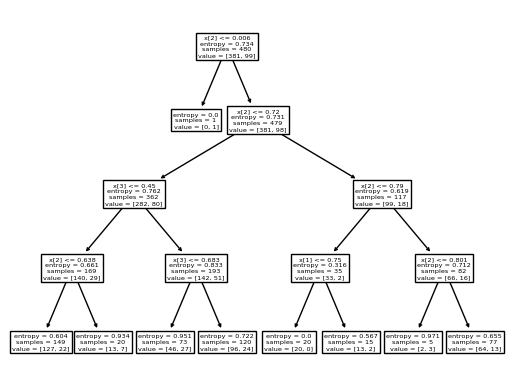

In [ ]:
tree.plot_tree(model)
plt.show()

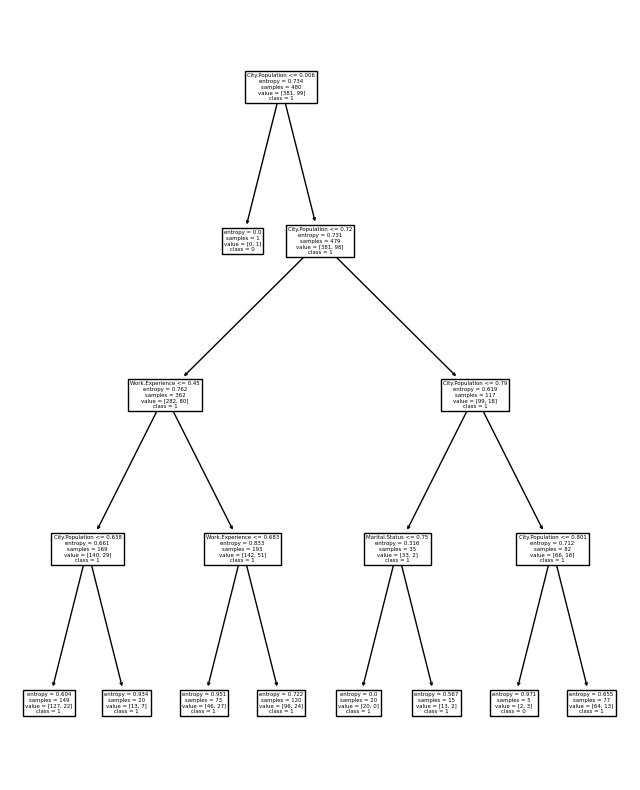

In [ ]:
fn=df.columns
cn=['1','0']
plt.figure(figsize=(8,10))
tree.plot_tree(model,feature_names=fn,class_names=cn)
plt.show()

In [ ]:
pd.crosstab(ytest,ypred)

col_0,0.0,1.0
TaxInc,,
0.0,93,2
1.0,25,0


In [ ]:
np.mean(ypred==ytest)

0.775

### **Building Decision Tree Classifier (CART) using Gini Criteria**

In [ ]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [ ]:
model1.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=4)

In [ ]:
ypred1=model1.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87        95
         1.0       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.62      0.78      0.69       120



In [ ]:
accuracy_score(ytest,ypred1)

0.7416666666666667

# **RANDOM FOREST Model Building**

In [751]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy",n_estimators=300,max_features=3)

In [753]:
res=cross_val_score(rf,x,y,cv=10)

In [755]:
print(res.mean())

0.7466666666666667


# **Building Model using AdaBoost ensemble Technique**

In [756]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=30)
res1=cross_val_score(ad,x,y,cv=10)

In [757]:
print(res1.mean())

0.77
